## Introduction
 
### Analysis and Visualization of Prosper Loan Data from 2005 - 2014 by Chinelo Linda Okafor


In [47]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('mode.chained_assignment', None)

### Get data

In [48]:
#read data
data = pd.read_csv('./data/prosperLoanData.csv')

In [49]:
#Check the data columns
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [50]:
#shape of the data 
data.shape

(113937, 81)

In [51]:
# statistical summary
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [52]:
# get the wholistic view of the data to check for error
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Some of the variables have missing values. Let's have a visual glimpse.

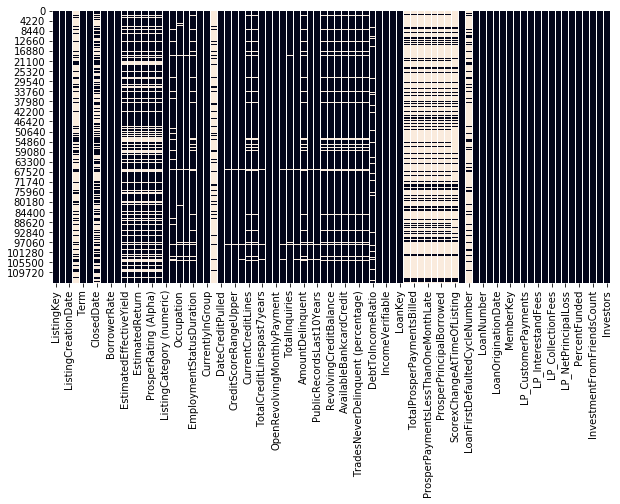

In [53]:
# plotting heat map to # plotting heat map to check for error
sns.heatmap(data.isnull(), cbar=False);

#### Wow, that's a lot of missing values. For better understanding, we will calculate the percent of missing values for each valiable.

In [54]:
# getting percentage of each missing data
per_of_missing_val = round(data.isnull().sum() / len(data) * 100, 2)

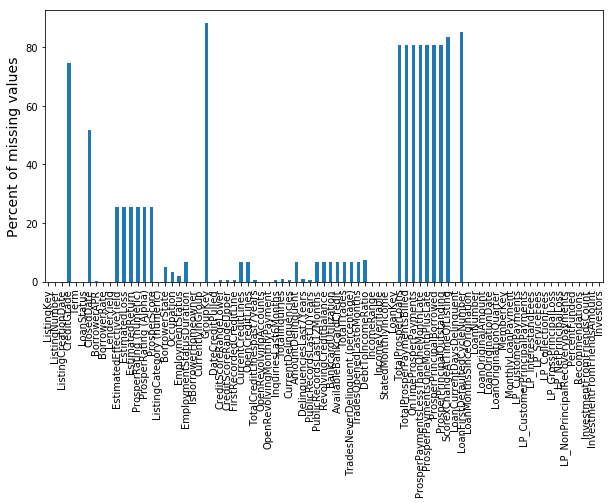

In [55]:
# plot missing values
per_of_missing_val.plot.bar()
plt.ylabel('Percent of missing values', fontsize=14);

#### The above plot shows that some of the columns have missing values as high as 80%. Let's filter out those columns, including those with missing values more than 50%.

In [56]:
# percentage of missing values above 50
per_of_missing_val[per_of_missing_val > 50]

CreditGrade                            74.59
ClosedDate                             51.65
GroupKey                               88.29
TotalProsperLoans                      80.62
TotalProsperPaymentsBilled             80.62
OnTimeProsperPayments                  80.62
ProsperPaymentsLessThanOneMonthLate    80.62
ProsperPaymentsOneMonthPlusLate        80.62
ProsperPrincipalBorrowed               80.62
ProsperPrincipalOutstanding            80.62
ScorexChangeAtTimeOfListing            83.39
LoanFirstDefaultedCycleNumber          85.12
dtype: float64

At a first glance, these all seem like missing values, but a quick look at the description of this variables in the description file showed otherwise. Take CreditGrade for instance, all loans after 2009 were not given a credit score. For other columns, client did not meet the criteria at the time this loans listings were pulled. If the need to use any of these columns arise, we will consider a desirable means of handling them.

## Univariate Analysis

### Listing Creation Date
As seen earlier, the Listing creation date has a data type 'object', we will change it to its appropriate format and perfom some exploration.

In [57]:
loan_df = data.copy()
# change dtype to datetime
loan_df.ListingCreationDate = loan_df.ListingCreationDate.astype('datetime64[ns]')

#### Create new varaibles, ListingCreationYear, ListingCreationMonth,  ListingCreationDay, and ListingCreatingHour.

In [58]:
# Create new varaibles, ListingCreationYear, ListingCreationMonth, ListingCreationDay, and ListingCreatingHour.
loan_df['ListingCreationYear'] = loan_df.ListingCreationDate.dt.year
loan_df['ListingCreationMonth'] =loan_df.ListingCreationDate.dt.month
loan_df['ListingCreationDay'] = loan_df.ListingCreationDate.dt.day
loan_df['ListingCreationHour'] = loan_df.ListingCreationDate.dt.hour

In [59]:
# defining plots 
base_color = sns.color_palette()[0]
def plot_bar(df, column, title):
    """plot a count plot of a pandas series
    """
    sns.countplot(df[column], color=base_color)
    plt.title(title, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xlabel(column, fontsize=14);

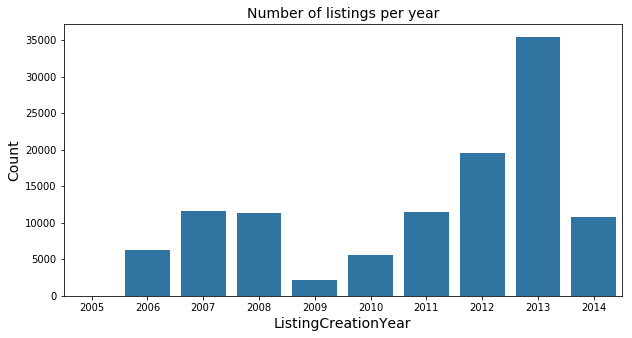

In [60]:
# plot of listings per year
plot_bar(loan_df, 'ListingCreationYear', 'Number of listings per year')

The above bar plot shows that there was great decline in loan listing in 2009, followed by a continued growth up to 2013. There is an explanation for this, as seen on [wikipedia]()
>"On November 24, 2008, the SEC found Prosper to be in violation of the Securities Act of 1933. As a result of these findings, the SEC imposed a cease and desist order on Prosper ... In July 2009, Prosper reopened their website for lending ("investing") and borrowing after having obtained SEC registration for its loans ("notes"). After the relaunch, bidding on loans was restricted to residents of 28 U.S. states and the District of Columbia. Borrowers may reside in any of 47 states, with residents of three states (Iowa, Maine, and North Dakota) not permitted to borrow through Prosper ... The lawsuit was settled July 19, 2013 for 10 million dollars paid in installments over three years."

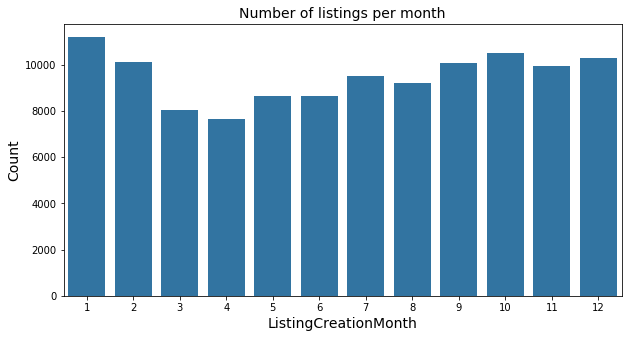

In [61]:
# plot of average listing per month with the uncleaned data
plot_bar(loan_df, 'ListingCreationMonth', 'Number of listings per month')

There are more listing creation during the start and end of the year. But how true is this? To answer this we need to find why the number of listings dropped in 2014 and also take a look at the number of listings available for the months in each year. And as mentioned earlier, Proper Loan did take a time off from offering its services.

In [62]:
# grouping the listing by year and month
loans_by_year_months = loan_df.groupby(['ListingCreationYear', 'ListingCreationMonth'])['ListingCreationMonth'].count().to_frame()
loans_by_year_months.columns = ['NumberOfListingsCreated']

In [63]:
# plotting of the graph of all year listing to determine how the data is distributed from January to december
def plot_year(year):
    loans_by_year_months.loc[[year]].plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel('Number of listings')
    plt.title(f'Number of listings by month for {year}');

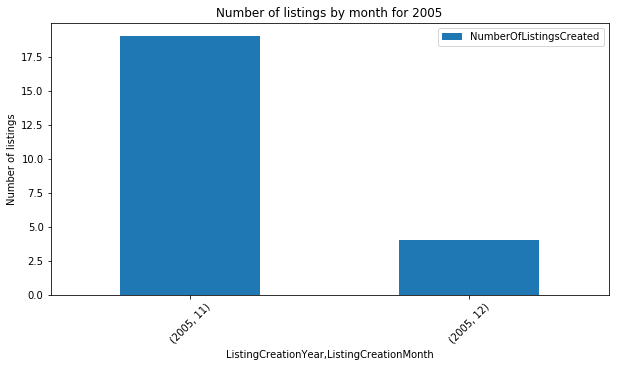

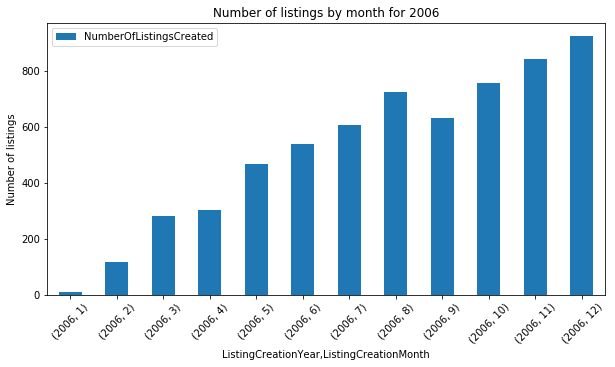

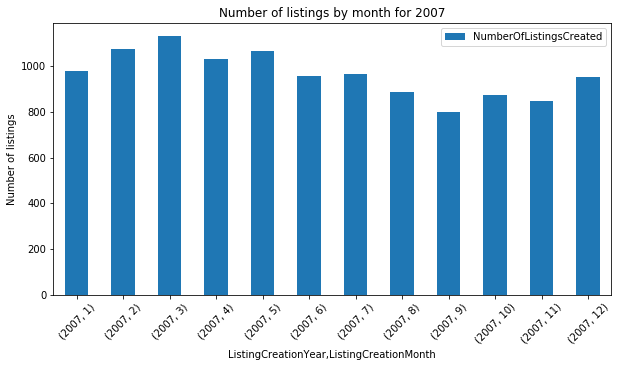

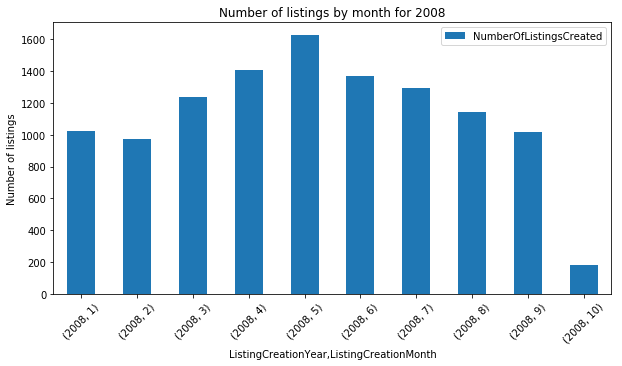

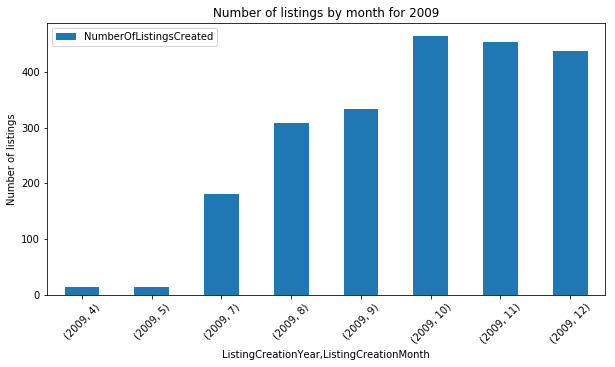

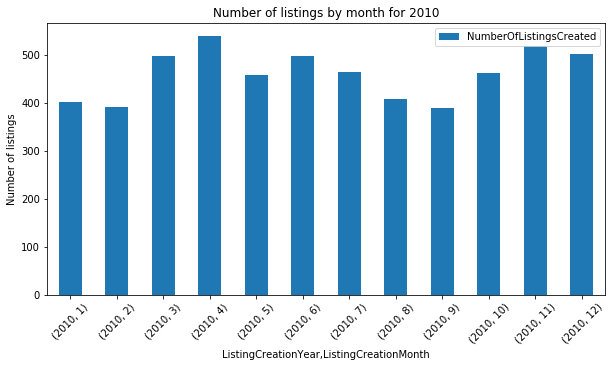

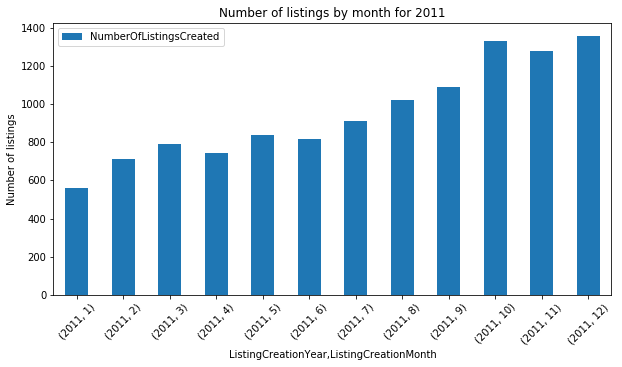

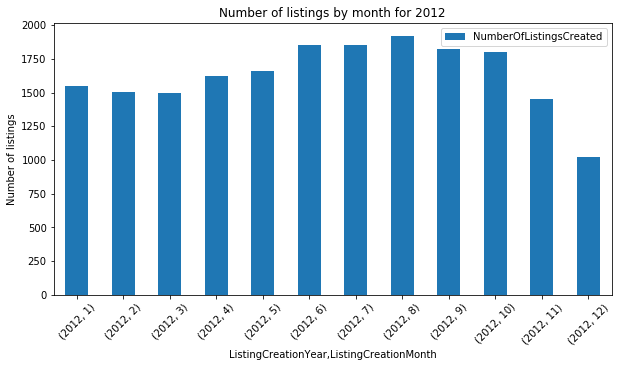

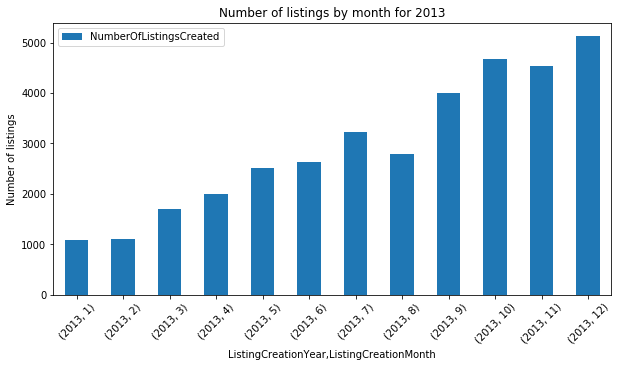

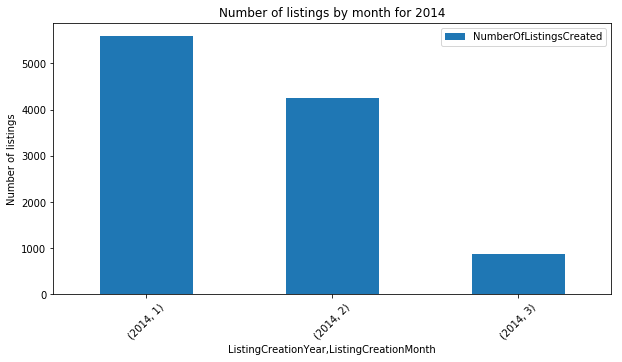

In [64]:
for year in range(2005, 2015):
    plot_year(year)

As seen in the above plots, the data for some months are not available. So, we will calculate the total number monthly listings for years where the data for all the 12 months of the year are available. we also see that, for 2014, we only have data for the first qaurter of the year. 

In [65]:
month_not_missing = loan_df[loan_df.ListingCreationYear.isin([2006, 2007, 2010, 2011,2013])]

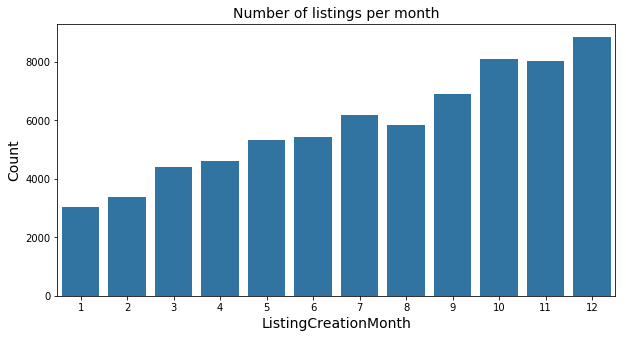

In [66]:
plot_bar(month_not_missing, 'ListingCreationMonth', 'Number of listings per month')

The plot here is quite different from the initial one we plotted. Taking out the years with missing months gives a better picture of when listings where created. We see a trend, increasing from January to December.

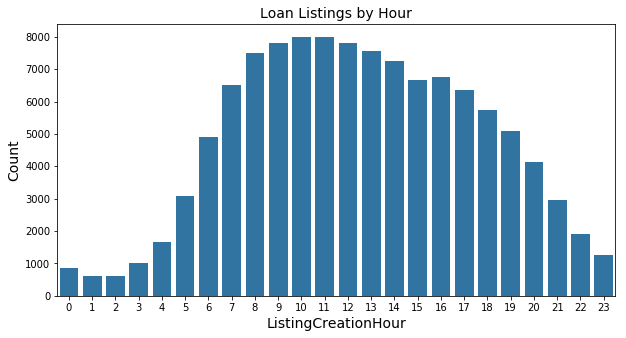

In [67]:
# cleaning data of years with missing month we can see the distribution is well defined than before
plot_bar(loan_df, 'ListingCreationHour', 'Loan Listings by Hour')

Most listings were created during working hours. We see a trend increasing from the early mornings and decline towards late evenings.

## Loan Term

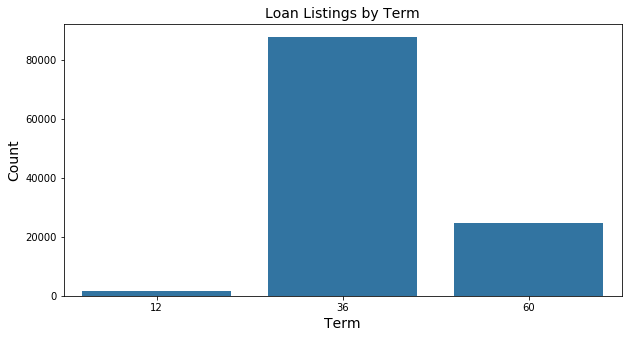

In [68]:
# let's look at a plot of loan listing
plot_bar(loan_df, 'Term', 'Loan Listings by Term');

It seems like more borrowers opted for the 36 month term loan, and followed far behind by the 60 term loan. Quite a few number of borrowers took loans that takes 12 months to pay back. Let us view this in percentages.

In [69]:
# checking the percentage
term_per = (round(loan_df.Term.value_counts() / len(loan_df) * 100, 2))
term_per

36    77.04
60    21.54
12     1.42
Name: Term, dtype: float64

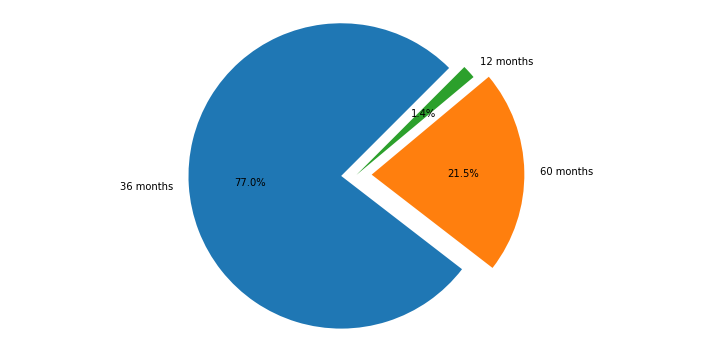

In [70]:
#plot of pie chart of loan terms
labels = ['36 months', '60 months', '12 months']
explode = (0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(term_per, autopct='%1.1f%%', labels=labels, explode=explode, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

We see that 77.04% of all the listings belong to the 36 month category.

## Prosper score
We will change this from numeric to categorical column and plot the count for each level.

In [71]:
# filter out null values
prosper_score_df = loan_df[loan_df.ProsperScore.notnull() ==True]
# to categorical
prosper_score_df.ProsperScore = pd.Categorical(prosper_score_df.ProsperScore.astype(int))

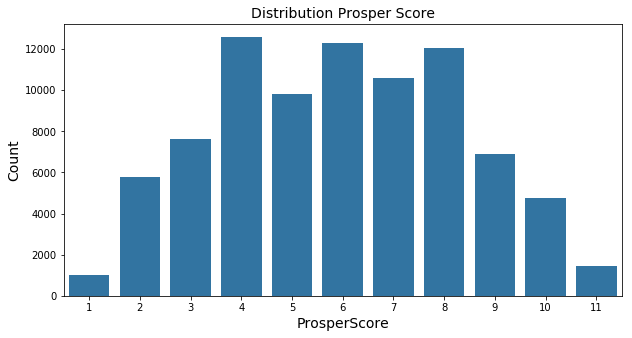

In [72]:
# plot of prosper score distribution
plot_bar(prosper_score_df, 'ProsperScore', 'Distribution Prosper Score')

## Stated Monthly Income

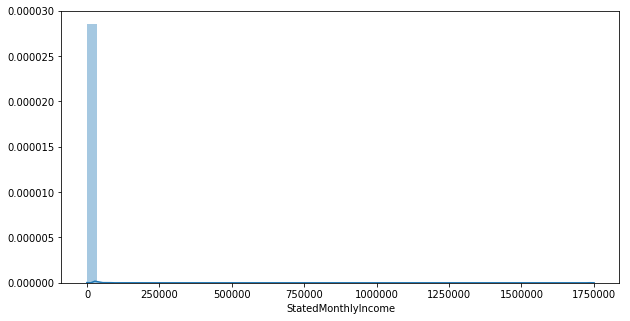

In [73]:
# plot of stated monthly income
sns.distplot(loan_df.StatedMonthlyIncome);

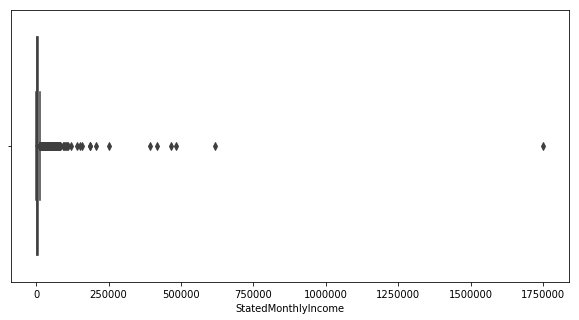

In [74]:
# checking for outliers in monthly income
sns.boxplot(loan_df.StatedMonthlyIncome);

We see a lot of outliers in the Stated Monthly Income. We will take care of this in the next cell.

In [75]:
# let us look at the stated monthly income <= 2000
income_less_equal_20000 = loan_df.query('StatedMonthlyIncome <= 20000')['StatedMonthlyIncome']

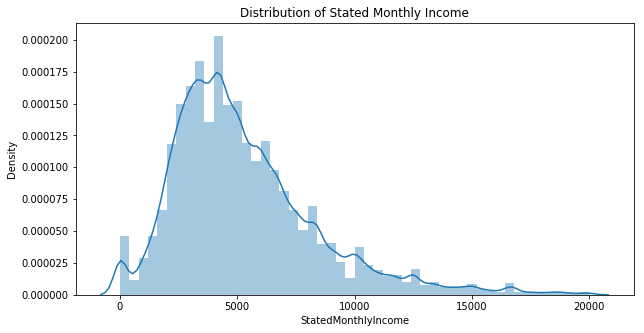

In [76]:
# plot the distribution os monthly income
sns.distplot(income_less_equal_20000)
plt.title('Distribution of Stated Monthly Income')
plt.ylabel('Density');

In [77]:
#Let us see the 25% and 75% stated monthly income
stat = loan_df.StatedMonthlyIncome.describe()
stat['25%'], stat['75%']

(3200.333333, 6825.0)

It seems like most borrowers earn between 3200 and 6800 dollars.

## Loan Original Amount

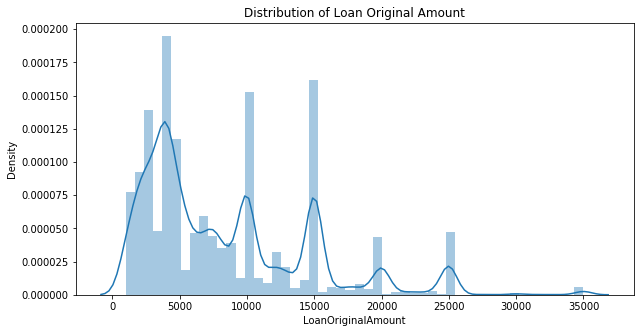

In [78]:
#plot original loan amount
sns.distplot(loan_df.LoanOriginalAmount)
plt.ylabel('Density')
plt.title('Distribution of Loan Original Amount');

It seems like most borrowers prefer to take rounded amounts in 5s or 10s of thousands.

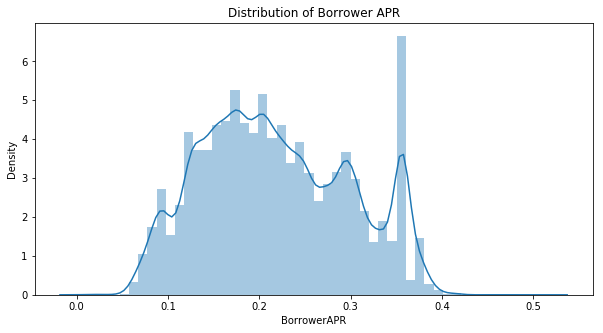

In [79]:
# plot of brower apr distribution
sns.distplot(loan_df.BorrowerAPR[loan_df.BorrowerAPR.notnull()])
plt.title('Distribution of Borrower APR')
plt.ylabel('Density');

Most borrowers have an APR below 0.3. There is however a spike between 0.3 and 0.4

## Bivariate Analysis
In this section, We will try to find relation between some variables.

### Does high prosper score mean low borrower APR?

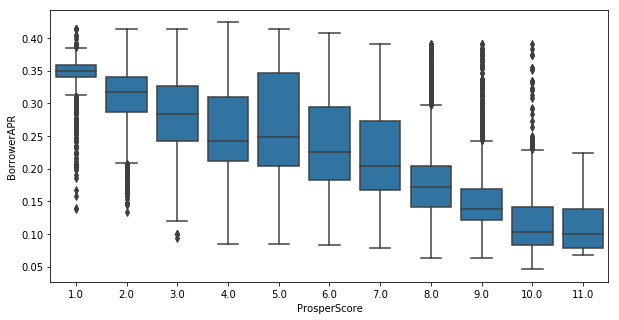

In [80]:
# boxplot of prosperscore and BorrowerAPR
sns.boxplot(x='ProsperScore', y='BorrowerAPR', data=loan_df, color=base_color);

We see that as the prosper score increases, the BorrowerAPR decreases. This implies that borrowers with higher prospers score tend to pay lesser interest. But this is not always the case, the outliers in the box plot above shows that at a lesser ProsperScore level some borrower still paid lesser interest. Same occurence is spotted at higher Prosper Scores.



### Is the a relationship between Loan Original Amount and Stated Monthly Income?

In [81]:
# plot definintion
def plot_scatter(df, x, y):
    plt.scatter(x=x, y=y, data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Relationship Between {x} and {y}.')

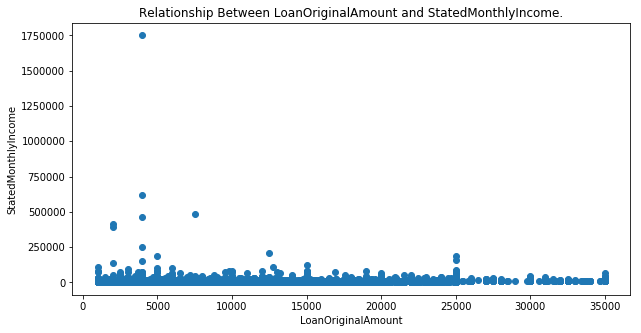

In [82]:
# scatter plot of LoanOriginalAmount,StatedMonthlyIncome
plot_scatter(loan_df, 'LoanOriginalAmount', 'StatedMonthlyIncome')

There is no relationship between Loan Original Amount and Stated Monthly Income.

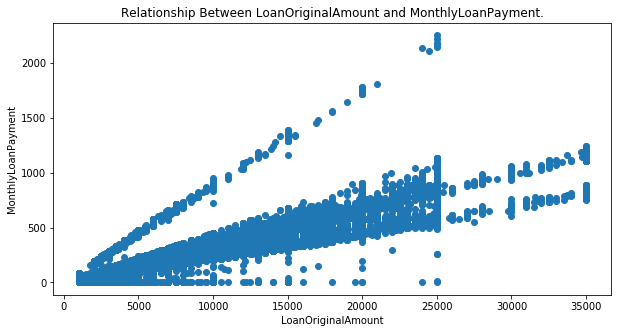

In [83]:
# Scatter plot of Monthly loan payment and LoadOriginalAmount
plot_scatter(loan_df, 'LoanOriginalAmount', 'MonthlyLoanPayment')

There is a positive relationship between Loan Orinal Amount and Monthly Loan Payment.

### Multivariate Analysis

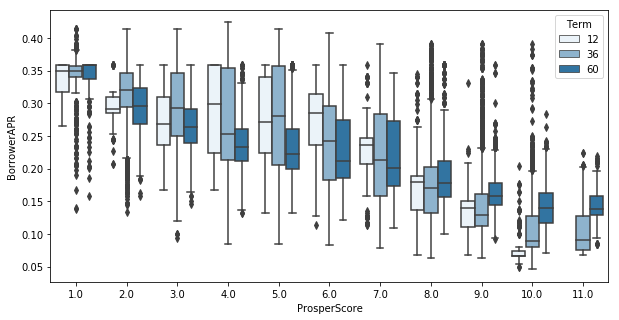

In [84]:
# boxplot of prosperscore and BorrowerAPR
sns.boxplot(x='ProsperScore', y='BorrowerAPR', data=loan_df, color=base_color, hue='Term');

In [85]:
# term to categorical variable
loan_df.Term = pd.Categorical(loan_df.Term)

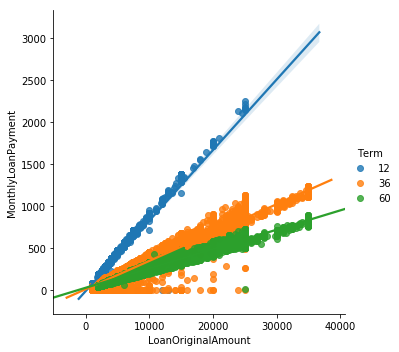

In [86]:
# Scatter plot of Monthly loan payment and LoadOriginalAmount
sns.lmplot(x='LoanOriginalAmount', y='MonthlyLoanPayment', data=loan_df, hue='Term');

This shows that while there is correlation between LoanOriginalAmount and MonthlyLoanPayment, borrowers with shorter loan terms tend to have a higher MonthlyLoanPayment.

# Summary

Most loan listings were created during working hours. We see a trend increasing from the early mornings and decline towards late evenings.

We see that 77.04% of all the loan listings belong to the 36 month duration category.

Borrowers earn between 3200 and 6800 dollars.

There is correlation between LoanOriginalAmount and MonthlyLoanPayment, borrowers with shorter loan terms tend to have a higher MonthlyLoanPayment.
